# Creating Station Sub-Raster of weekly summed regnie data
starting with 2008-2017

In [1]:
import pandas as pd
import numpy as np
import rasterio as rio
import glob
import matplotlib.pyplot as plt
import os

In [2]:
data_drive = r'G:/'

## 1. Calculating the weekly sum of precipitation

In [3]:
regnie_path = data_drive + r'GruV-Net/data/precipitation/GTiff/'
dst_folder = data_drive + r'GruV-Net/data/precipitation/weekly-sum/GTiff/'
regnie_files_paths = glob.glob(regnie_path+'ra08*.tif') + glob.glob(regnie_path+'ra09*.tif') + glob.glob(regnie_path+'ra10*.tif') + glob.glob(regnie_path+'ra11*.tif') + glob.glob(regnie_path+'ra12*.tif') + glob.glob(regnie_path+'ra13*.tif') + glob.glob(regnie_path+'ra14*.tif') + glob.glob(regnie_path+'ra15*.tif') + glob.glob(regnie_path+'ra16*.tif') + glob.glob(regnie_path+'ra17*.tif')
regnie_files_paths.sort()
regnie_files = list(map(os.path.basename, regnie_files_paths))

6
080107


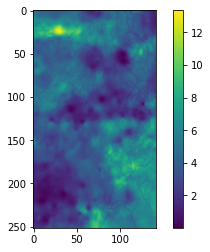

080108
080109
080110
080111
080112
080113


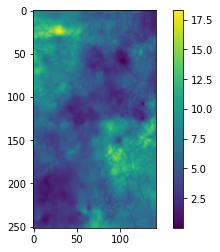

13
080114


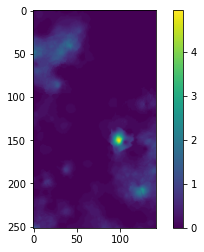

080115
080116
080117
080118
080119
080120


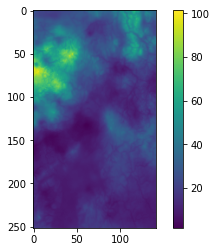

In [4]:
#for i in range(6, len(regnie_files), 7):
for i in range(6, 14, 7):
    print(i)
    print(regnie_files[i][2:8])
    #dst_file = (dst_folder + 'rws_20'+regnie_files[i][2:4]+'-'+regnie_files[i][4:6]+'-'+regnie_files[i][6:8]+'.tif')
    f = rio.open(regnie_files_paths[i])
    meta = f.meta
    raster = f.read(1)
    plt.imshow(raster)
    plt.colorbar()
    plt.show()
    for j in range(1, 7):
        print(regnie_files[i+j][2:8])
        raster = np.add(raster, rio.open(regnie_files_paths[i+j]).read(1))
    plt.imshow(raster)
    plt.colorbar()
    plt.show()
    #with rio.open(dst_file, 'w', **meta) as dst:
        #dst.write(raster, 1)

## 2. Creating the Sub-Rasters (+Export?)

In [75]:
stammdaten = pd.read_excel(data_drive +r'GruV-Net/data/Stammdaten_HE.xlsx')
stammdaten.set_index('Proj_ID', inplace=True)
gw_weekly = pd.read_csv(data_drive +r'GruV-Net/data/groundwater_levels_preprocessed_hesse/weekly/gw_lvl_complete.csv')
gw_weekly.set_index('Datum', inplace=True)

In [76]:
stammdaten.head()

ID    BEZEICHNUNG  KURZNAME MESSSTELLENART  RECHTSWERT  HOCHWERT  \
Proj_ID                                                                       
HE_5001  5001     LANGENTHAL    359007             BR     3524980   5718480   
HE_5003  5003  HELMARSHAUSEN    359006             BR     3532760   5721100   
HE_5036  5036     EBERSCHÜTZ    359002             BR     3524090   5711310   
HE_5039  5039      BEBERBECK    359009             BR     3534080   5712150   
HE_5060  5060      HEISEBECK    359001             BR     3545380   5717240   

         OSTWERT  NORDWERT                             TEILRAUM_NAME  \
Proj_ID                                                                
HE_5001   524896   5716633  Borgentreicher Mulde und Kasseler Graben   
HE_5003   532673   5719251          Fulda-Werra Bergland und Solling   
HE_5036   524007   5709465  Borgentreicher Mulde und Kasseler Graben   
HE_5039   533993   5710305          Fulda-Werra Bergland und Solling   
HE_5060   545288   5715393          Fulda-Werra Bergland und Solling   

        GRUNDWASSERKOERPER  GELAENDEHOEHE  MESSPUNKTHOEHE  \
Proj_ID                                                     
HE_5001        4400.1_5112         196.86          197.40   
HE_5003          4400_5201         150.07          150.66   
HE_5036          4400_5112         132.85          132.85   
HE_5039          4400_5201         245.69          246.53   
HE_5060        4300.2_5201         206.99          207.14   

        ZUSTAENDIGE_BEHOERDE  BRUNNEN_SOHLTIEFE  F_OBERKANTE  F_UNTERKANTE  \
Proj_ID                                                                      
HE_5001           RPU Kassel               95.0         66.0          94.0   
HE_5003           RPU Kassel               76.0         62.0          74.0   
HE_5036           RPU Kassel                3.2          NaN           NaN   
HE_5039           RPU Kassel               58.0         41.0          57.0   
HE_5060           RPU Kassel               14.2          NaN           NaN   

                 Messbeginn    Messende_aktuell  
Proj_ID                                          
HE_5001 1988-05-10 12:00:00 2018-03-06 12:00:00  
HE_5003 1987-12-03 12:00:00 2018-01-24 12:00:00  
HE_5036 1950-11-06 12:00:00 2000-11-04 12:00:00  
HE_5039 1967-02-06 12:00:00 2018-06-02 12:00:00  
HE_5060                 NaT                 NaT

In [53]:
gw_weekly.head()

HE_10007  HE_10021  HE_10022  HE_10023  HE_10025  HE_10026  \
Datum                                                                    
1911-04-10       NaN       NaN       NaN       NaN       NaN       NaN   
1911-04-17       NaN       NaN       NaN       NaN       NaN       NaN   
1911-04-24       NaN       NaN       NaN       NaN       NaN       NaN   
1911-05-01       NaN       NaN       NaN       NaN       NaN       NaN   
1911-05-08       NaN       NaN       NaN       NaN       NaN       NaN   

            HE_10034  HE_10041  HE_10042  HE_10047  ...  HE_9957  HE_9958  \
Datum                                               ...                     
1911-04-10       NaN       NaN       NaN       NaN  ...      NaN      NaN   
1911-04-17       NaN       NaN       NaN       NaN  ...      NaN      NaN   
1911-04-24       NaN       NaN       NaN       NaN  ...      NaN      NaN   
1911-05-01       NaN       NaN       NaN       NaN  ...      NaN      NaN   
1911-05-08       NaN       NaN       NaN       NaN  ...      NaN      NaN   

            HE_9959  HE_9961  HE_9969  HE_9974  HE_9977  HE_9980  HE_9984  \
Datum                                                                       
1911-04-10      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1911-04-17      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1911-04-24      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1911-05-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1911-05-08      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            HE_9987  
Datum                
1911-04-10      NaN  
1911-04-17      NaN  
1911-04-24      NaN  
1911-05-01      NaN  
1911-05-08      NaN  

[5 rows x 1268 columns]

In [33]:
rws_files_paths = glob.glob(dst_folder+'*.tif')
rws_files_paths.sort()
rws_files = list(map(os.path.basename, rws_files_paths))

In [34]:
rws_files

['rws_2008-01-07.tif',
 'rws_2008-01-14.tif',
 'rws_2008-01-21.tif',
 'rws_2008-01-28.tif',
 'rws_2008-02-04.tif',
 'rws_2008-02-11.tif',
 'rws_2008-02-18.tif',
 'rws_2008-02-25.tif']

HE_10007
177 61


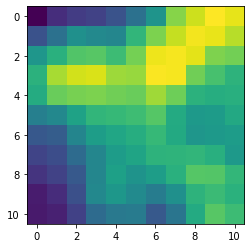

F:/GruV-Net/data/precipitation/sub-raster/weekly-sum/GTiff/HE_10007_2008-01-07.tif
HE_10021
176 61


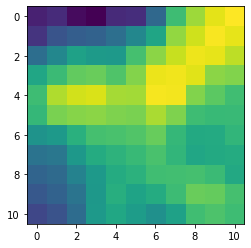

F:/GruV-Net/data/precipitation/sub-raster/weekly-sum/GTiff/HE_10021_2008-01-07.tif
HE_10022
176 62


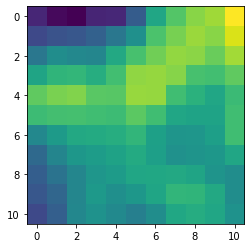

F:/GruV-Net/data/precipitation/sub-raster/weekly-sum/GTiff/HE_10022_2008-01-07.tif
HE_10025
176 61


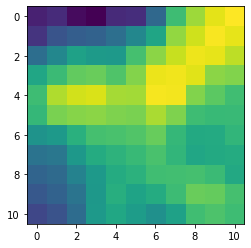

F:/GruV-Net/data/precipitation/sub-raster/weekly-sum/GTiff/HE_10025_2008-01-07.tif
HE_10042
171 61


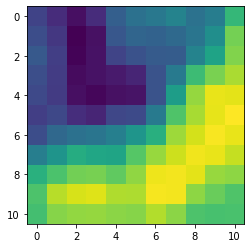

F:/GruV-Net/data/precipitation/sub-raster/weekly-sum/GTiff/HE_10042_2008-01-07.tif
HE_10047
183 68


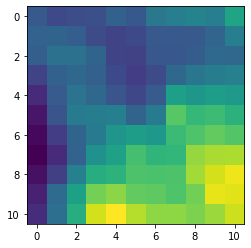

F:/GruV-Net/data/precipitation/sub-raster/weekly-sum/GTiff/HE_10047_2008-01-07.tif
HE_10054
181 63


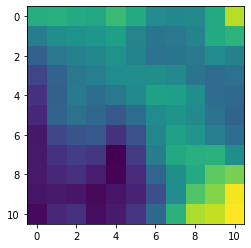

F:/GruV-Net/data/precipitation/sub-raster/weekly-sum/GTiff/HE_10054_2008-01-07.tif
HE_10072
181 64


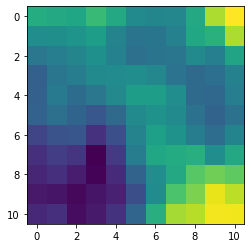

F:/GruV-Net/data/precipitation/sub-raster/weekly-sum/GTiff/HE_10072_2008-01-07.tif
HE_10074
181 63


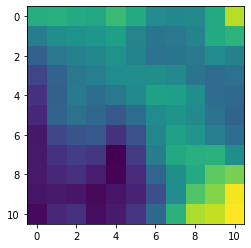

F:/GruV-Net/data/precipitation/sub-raster/weekly-sum/GTiff/HE_10074_2008-01-07.tif
HE_10082
180 63


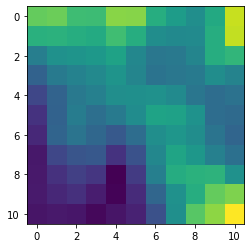

F:/GruV-Net/data/precipitation/sub-raster/weekly-sum/GTiff/HE_10082_2008-01-07.tif


In [97]:
dst_folder = data_drive + r'GruV-Net/data/precipitation/sub-raster/weekly-sum/GTiff/'

for f, p in zip(rws_files[:1], rws_files_paths[:1]):
    src = rio.open(p)
    meta = src.meta
    stations = gw_weekly.loc[ f[4:14] , : ].dropna().index.tolist()
    for s in stations[:10]:
        east = stammdaten.loc[s]['OSTWERT']
        north = stammdaten.loc[s]['NORDWERT']
        row, col = src.index(east, north)
        print(s)
        print(row, col)
        r = src.read(1, window=rio.windows.Window(col-5, row-5, 11, 11))
        plt.imshow(r)
        plt.show()
        #meta.update(height=11, width=11)
        #dst_file = dst_folder + s +'_'+f[4:]
        #print(dst_file)
        #with rio.open(dst_file, 'w', **meta) as dst:
            #dst.write(r, 1)